# Realizado no Google colab

Desafio módulo 1: Bootcamp de Analista de Machine Learning da IGTI

Participante: **Iure Rosa Lima de Oliveira**

**Objetivos**

Exercitar os seguintes conceitos trabalhados no Módulo:

* Análise exploratória dos dados (EDA - Exploratory Data Analysis)
* Preparação dos dados
* Análise de modelos

**Enunciado**

Neste desafio serão abordados todos os conceitos apresentados durante a disciplina Fundamentos de Machine Learning (FAM). Para este desafio será utilizada uma versão modificada do dataset “Bike Sharing” disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). Esse dataset contém um conjunto de informações sobre o compartilhamento de bicicletas. Existem informações sobre as condições climáticas e dados sobre a locação das bicicletas. Para este desafio é necessário baixar o arquivo “comp_bikes_mod.csv” presente neste link: [clique aqui](https://drive.google.com/file/d/1gUV6yHZfHWBQoHxApg6VZ85oVKgIlxx4/view).

**Respostas Finais**

Os alunos deverão desenvolver a prática e, depois, responder às seguintes questões objetivas:

In [ ]:
# Esta rotina é para carregar o arquivo para o repositório do google Colab
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
from sklearn.tree import DecisionTreeRegressor

In [ ]:
nome_do_arquivo="comp_bikes_mod.csv"
df= pd.read_csv(nome_do_arquivo)

In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


# Pergunta 1
No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [ ]:
df.shape

(17379, 17)

# Pergunta 2
Quantos tipos diferentes de dados existem no dataset do desafio?

In [ ]:
df.dtypes.value_counts()

float64    16
object      1
dtype: int64

Resposta: **2 tipos**

# Pergunta 3
Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?

In [ ]:
round((df.temp.isna().sum() / 17379) *100,2)

10.0

Resposta: **10%**

# Pergunta 4
Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?

In [ ]:
df_retirar = df[df.dteday.isna()==False]

In [ ]:
df_retirar.shape

(15641, 17)

Resposta: **(15641, 17)**

# Pergunta 5
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

In [ ]:
df_retirar.temp.mean()

0.4969259206597582

Resposta: **0.496**

# Pergunta 6
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

In [ ]:
df_retirar.windspeed.std()

0.12230930508286268

Resposta: **0.122**

# Pergunta 7
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

In [ ]:
df_retirar.season.isna().sum()

1580

**Como existem valores nulos e o enunciado não diz nada em considerá-los**

Vou ignorar eles

In [ ]:
enc = LabelEncoder()
enc.fit(df_retirar.season[df_retirar.season.isna()==False])

LabelEncoder()

In [ ]:
len(enc.classes_)

4

Resposta: **Quatro**

# Pergunta 8
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

In [ ]:
df_retirar['dteday']=pd.to_datetime(df_retirar['dteday'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_retirar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  float64       
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [ ]:
df_retirar.dteday.max()

Timestamp('2012-12-31 00:00:00')

Resposta: **31/12/2012**

# Pergunta 9
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

  * Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot. 
  * Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot. 
  * Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot. 
  * Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.

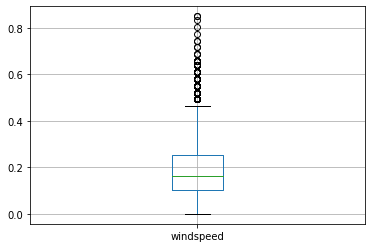

In [ ]:
df_retirar.boxplot(column='windspeed')

Resposta: **Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.**

# Pergunta 10
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

  * Possuem alta correlação linear positiva. 
  * Possuem alta correlação linear negativa. 
  * Possuem baixa correlação linear positiva. 
  * Possuem baixa correlação linear negativa. 

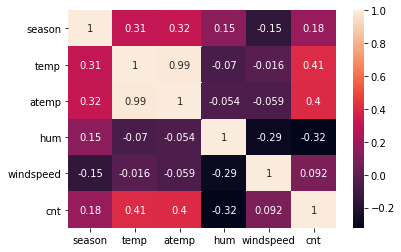

In [ ]:
sns.heatmap(df_retirar[['season','temp','atemp','hum','windspeed','cnt']].corr(),annot=True)


Resposta: **Possuem baixa correlação linear negativa.**

# Pergunta 11
Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

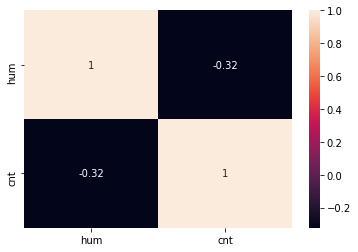

In [ ]:
sns.heatmap(df_retirar[['hum','cnt']].corr(),annot=True)


In [ ]:
df_sem_nuls = pd.DataFrame(columns=['hum','cnt','casual'])
df_sem_nuls['hum']=df['hum']
df_sem_nuls['cnt']=df['cnt']
df_sem_nuls['casual']=df['casual']


In [ ]:
df_sem_nuls['hum'].fillna(df_sem_nuls['hum'].mean(),inplace=True)
df_sem_nuls['cnt'].fillna(df_sem_nuls['cnt'].mean(),inplace=True)
df_sem_nuls['casual'].fillna(df_sem_nuls['casual'].mean(),inplace=True)

In [ ]:
lr = LinearRegression()
X = df_sem_nuls[['hum','casual']].values
Y = df_sem_nuls['cnt'].values

In [ ]:
_fit=lr.fit(X,Y)
previsao = lr.predict(X)
print(_fit.score(X,Y),r2_score(Y,previsao))

0.40561165206692495 0.40561165206692495


Resposta: **O valor de R2 é 0.40**

# Pergunta 12
Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

In [ ]:
dtr = DecisionTreeRegressor(random_state=1)
_fitDtr = dtr.fit(X,Y)
previsao = dtr.predict(X)

print(_fitDtr.score(X,Y), r2_score(Y,previsao))

0.6973174287156154 0.6973174287156154


Resposta: **0.70**

# Pergunta 13
Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

  * O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão. 
  * O valor encontrado pela árvore de decisão foi negativo. 
  * **O valor obtido pela árvore de decisão como regressor apresenta maior R2**
  * Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos.


  Resposta **O valor obtido pela árvore de decisão como regressor apresenta maior R2**

# Pergunta 14
Com base na árvore de decisão é CORRETO afirmar:

  * Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da árvore de decisão. 
  * **Pode ser utilizada para classificação e regressão.** 
  * Ávore de Decisão é utilizada apenas para a classificação de dados contínuos. 
  * A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos.


Resposta: **Pode ser utilizada para classificação e regressão.**

# Pergunta 15
Comparando o SVM com a árvore de decisão é CORRETO afirmar:

  * Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes. 
  * Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM. 
  * SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação. 
  * **SVM encontra o hiperplano que gera a maior separação entre os dados.**

Resposta: **SVM encontra o hiperplano que gera a maior separação entre os dados**